In [1]:
#imports
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.signal as signal #signal processing stuff (e.g. filters, hilbert transform, etc.)
import scipy
import struct
import os
import matplotlib.pyplot as plt
import pyqtgraph as pg
import seaborn as sns
import svgutils.transform as sg
import nelpy as nel
import nelpy.plotting as npl
import sys
from IPython.display import SVG, display, Image
sns.set(rc={'figure.figsize': (12, 4),'lines.linewidth': 1, 'font.size': 18, 'axes.labelsize': 16, 'axes.titlesize':18, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')
sns.set_color_codes(palette='colorblind')
#plots show up within jupyter for matplotlib
%matplotlib inline

In [2]:
sigmuhz = np.arange(1.5,6.25,0.25)
detectionLatencyCalc = []
relativeDetectionLatencyCalc =[]
fpRateCalc = []
tpRateCalc = []
fpPercentCalc = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc.append(np.loadtxt(OPENME))
detectionLatencyCalc = np.asarray(detectionLatencyCalc)
relativeDetectionLatencyCalc = np.asarray(relativeDetectionLatencyCalc)
fpRateCalc = np.asarray(fpRateCalc)
tpRateCalc = np.asarray(tpRateCalc)
# fpPercentCalc = np.asarray(fpPercentCalc)

detectionLatencyCalc2 = []
relativeDetectionLatencyCalc2 = []
fpRateCalc2 = []
tpRateCalc2 = []
fpPercentCalc2 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc2.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoChan/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc2.append(np.loadtxt(OPENME)[0:1000])
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc2.append(np.loadtxt(OPENME))
detectionLatencyCalc2 = np.asarray(detectionLatencyCalc2)
relativeDetectionLatencyCalc2 = np.asarray(relativeDetectionLatencyCalc2)
fpRateCalc2 = np.asarray(fpRateCalc2)
tpRateCalc2 = np.asarray(tpRateCalc2)
# fpPercentCalc2 = np.asarray(fpPercentCalc2)

detectionLatencyCalc1 = []
relativeDetectionLatencyCalc1 = []
fpRateCalc1 = []
tpRateCalc1 = []
fpPercentCalc1 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativeDetectionLatencyCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc1.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc1.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc1.append(np.loadtxt(OPENME))
detectionLatencyCalc1 = np.asarray(detectionLatencyCalc1)
relativeDetectionLatencyCalc1 = np.asarray(relativeDetectionLatencyCalc1)
fpRateCalc1 = np.asarray(fpRateCalc1)
tpRateCalc1 = np.asarray(tpRateCalc1)
# fpPercentCalc1 = np.asarray(fpPercentCalc1)

100%|██████████| 19/19 [00:00<00:00, 58.73it/s]


In [3]:
detectionLatencyCalc2of3 = []
relativedetectionLatencyCalc2of3 = []
fpRateCalc2of3 = []
tpRateCalc2of3 = []
# fpPercentCalc1 = []
for z in tqdm(sigmuhz):
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/detectionLatency" + str((int)(z*100)) + ".out" 
    detectionLatencyCalc2of3.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/relativeDetectionLatency" + str((int)(z*100)) + ".out" 
    relativedetectionLatencyCalc2of3.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/fpRate" + str((int)(z*100)) + ".out" 
    fpRateCalc2of3.append(np.loadtxt(OPENME))
    OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/twoOfThree/tpRate" + str((int)(z*100)) + ".out" 
    tpRateCalc2of3.append(np.loadtxt(OPENME))
#     OPENME = "/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/paperData/offlineAnalysis/singleChan/singleChanDefn/fpPercent" + str((int)(z*100)) + ".out" 
#     fpPercentCalc1.append(np.loadtxt(OPENME))
detectionLatencyCalc2of3 = np.asarray(detectionLatencyCalc2of3)
relativedetectionLatencyCalc2of3 = np.asarray(relativedetectionLatencyCalc2of3)
fpRateCalc2of3 = np.asarray(fpRateCalc2of3)
tpRateCalc2of3 = np.asarray(tpRateCalc2of3)
# fpPercentCalc1 = np.asarray(fpPercentCalc1)

100%|██████████| 19/19 [00:00<00:00, 2310.44it/s]


In [4]:
relativeDetectionLatencyCalc *= 100
relativeDetectionLatencyCalc2 *= 100
relativedetectionLatencyCalc2of3 *= 100

## Paper

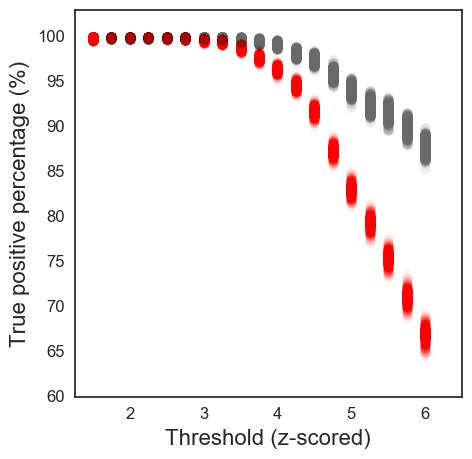

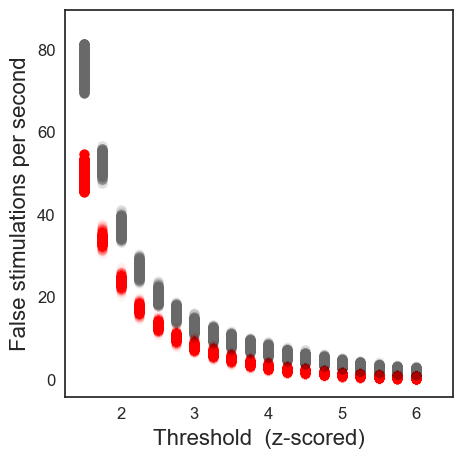

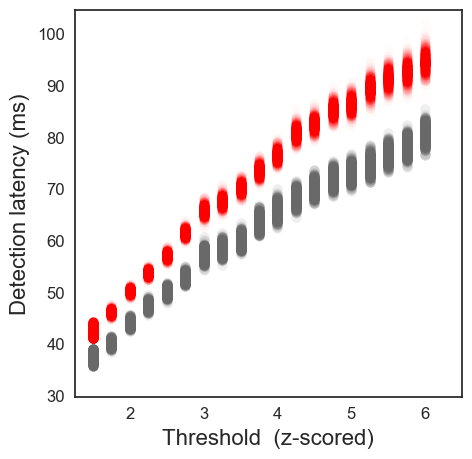

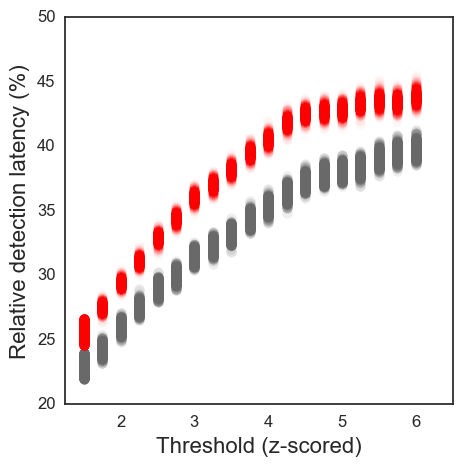

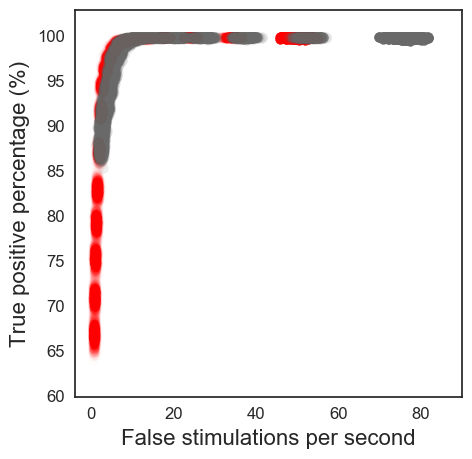

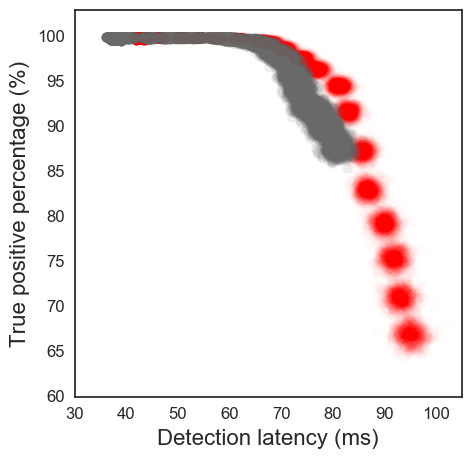

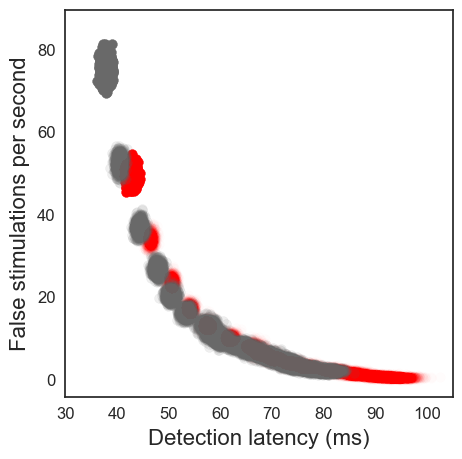

In [21]:
sns.set(rc={'figure.figsize': (5, 5),'lines.linewidth': 1, 'font.size': 18, 'axes.labelsize': 16, 'axes.titlesize':18, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')
sns.set_color_codes(palette='deep')

saveFigs = True

SINGLECHANNELCOLOR = 'dimgray'
TWOCHANNELCOLOR = 'red'
TWOCHANNELSHAPES = 'o'
alfa_2Chan = 0.01
alfa_1Chan = 0.1

tpRateLim = [60,103]
fsRateLim = [-4,90]
thresholdLim = [1.25,6.5]
detectLatLim = [30,105]

#TP RATE vs THRESHOLD
for i in range(0,tpRateCalc.shape[0]):
    if(i==0):
        plt.scatter(1.5+(np.ones(tpRateCalc.shape[1])*i*0.25),tpRateCalc[i][:]*100,alpha=1,s=50,color=SINGLECHANNELCOLOR, label='Single Channel')
        plt.scatter(1.5+(np.ones(tpRateCalc2.shape[1])*i*0.25),tpRateCalc2[i][:]*100,alpha=1,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES,label = 'Two Channel')
    else:
        plt.scatter(1.5+(np.ones(tpRateCalc.shape[1])*i*0.25),tpRateCalc[i][:]*100,alpha=alfa_1Chan,s=50,color=SINGLECHANNELCOLOR)
        plt.scatter(1.5+(np.ones(tpRateCalc2.shape[1])*i*0.25),tpRateCalc2[i][:]*100,alpha=alfa_2Chan,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES)
plt.xlabel("Threshold (z-scored)")
plt.ylabel("True positive percentage (%)")
plt.ylim(tpRateLim)
plt.xlim(thresholdLim)
# plt.legend(loc='upper right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpThresh.svg')
plt.show()

#FALSE STIM RATE vs THRESHOLD
for i in range(0,fpRateCalc.shape[0]):
    if(i == 0): 
        plt.scatter(1.5+(np.ones(fpRateCalc.shape[1])*(i)*0.25),fpRateCalc[i][:],alpha=1,s=50,color=SINGLECHANNELCOLOR,label='Single Channel')
        plt.scatter(1.5+(np.ones(fpRateCalc2.shape[1])*(i)*0.25),fpRateCalc2[i][:],alpha=1,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES,label='Two Channel')
    else:
        plt.scatter(1.5+(np.ones(fpRateCalc.shape[1])*(i)*0.25),fpRateCalc[i][:],alpha=alfa_1Chan,s=50,color=SINGLECHANNELCOLOR)
        plt.scatter(1.5+(np.ones(fpRateCalc2.shape[1])*(i)*0.25),fpRateCalc2[i][:],alpha=alfa_2Chan,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES)
plt.xlabel("Threshold  (z-scored)")
plt.ylabel("False stimulations per second")
plt.ylim(fsRateLim)
plt.xlim(thresholdLim)
# plt.legend(loc='upper right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fpThresh.svg')
plt.show()

# #FALSE STIM PERCENTAGE vs THRESHOLD
# for i in range(0,fpRateCalc.shape[0]):
#     if(i == 0): 
#         plt.scatter(1.5+(np.ones(fpPercentCalc.shape[1])*(i)*0.25),fpPercentCalc[i][:]*100,alpha=1,s=50,color=SINGLECHANNELCOLOR,label='Single Channel')
#         plt.scatter(1.5+(np.ones(fpPercentCalc2.shape[1])*(i)*0.25),fpPercentCalc2[i][:]*100,alpha=1,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES,label='Two Channel')
#     else:
#         plt.scatter(1.5+(np.ones(fpPercentCalc.shape[1])*(i)*0.25),fpPercentCalc[i][:]*100,alpha=alfa_1Chan,s=50,color=SINGLECHANNELCOLOR)
#         plt.scatter(1.5+(np.ones(fpPercentCalc2.shape[1])*(i)*0.25),fpPercentCalc2[i][:]*100,alpha=alfa_2Chan,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES)
# plt.xlabel("Threshold  (z-scored)")
# plt.ylabel("False positive percentage (%)")
# plt.ylim([0,104])
# # plt.xlim([4,6.1])
# # plt.legend(loc='upper right')
# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fpPercentageThresh.svg')
# plt.show()

#DETECTION LATENCY vs THRESHOLD
for i in range(0,detectionLatencyCalc.shape[0]):
    if(i == 0): 
        plt.scatter(1.5+(np.ones(detectionLatencyCalc.shape[1])*(i)*0.25),detectionLatencyCalc[i][:],alpha=1,s=50,color=SINGLECHANNELCOLOR,label='Single Channel')
        plt.scatter(1.5+(np.ones(detectionLatencyCalc2.shape[1])*(i)*0.25),detectionLatencyCalc2[i][:],alpha=1,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES,label='Two Channel')
    else:
        plt.scatter(1.5+(np.ones(detectionLatencyCalc.shape[1])*(i)*0.25),detectionLatencyCalc[i][:],alpha=alfa_1Chan,s=50,color=SINGLECHANNELCOLOR)
        plt.scatter(1.5+(np.ones(detectionLatencyCalc2.shape[1])*(i)*0.25),detectionLatencyCalc2[i][:],alpha=alfa_2Chan,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES)
plt.xlabel("Threshold  (z-scored)")
plt.ylabel("Detection latency (ms)")
plt.xlim(thresholdLim)
plt.ylim(detectLatLim)
# plt.legend(loc='lower right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latThresh.svg')
plt.show()

#RELATIVE DETECTION LATENCY vs THRESHOLD
for i in range(0,relativeDetectionLatencyCalc2.shape[0]):
    if(i == 0): 
        plt.scatter(1.5+(np.ones(relativeDetectionLatencyCalc.shape[1])*(i)*0.25),relativeDetectionLatencyCalc[i][:],alpha=1,s=50,color=SINGLECHANNELCOLOR,label='Single Channel')
        plt.scatter(1.5+(np.ones(relativeDetectionLatencyCalc2.shape[1])*(i)*0.25),relativeDetectionLatencyCalc2[i][:],alpha=1,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES,label='Two Channel')
    else:
        plt.scatter(1.5+(np.ones(relativeDetectionLatencyCalc.shape[1])*(i)*0.25),relativeDetectionLatencyCalc[i][:],alpha=alfa_1Chan,s=50,color=SINGLECHANNELCOLOR)
        plt.scatter(1.5+(np.ones(relativeDetectionLatencyCalc2.shape[1])*(i)*0.25),relativeDetectionLatencyCalc2[i][:],alpha=alfa_2Chan,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES)
plt.xlabel("Threshold (z-scored)")
plt.ylabel("Relative detection latency (%)")
plt.xlim(thresholdLim)
# plt.legend(loc='lower right')
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/relativeLatThresh.svg')
plt.show()

#TP vs FALSE STIM RATE
for i in range(0,detectionLatencyCalc.shape[0]):
    if(i == 0): 
        plt.scatter(fpRateCalc[i][:],tpRateCalc[i][:]*100,alpha=1,s=50,color=SINGLECHANNELCOLOR,label='Single Channel')
        plt.scatter(fpRateCalc2[i][:],tpRateCalc2[i][:]*100,alpha=1,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES,label='Two Channel')
    else:
        plt.scatter(fpRateCalc[i][:],tpRateCalc[i][:]*100,alpha=alfa_1Chan,s=50,color=SINGLECHANNELCOLOR)
        plt.scatter(fpRateCalc2[i][:],tpRateCalc2[i][:]*100,alpha=alfa_2Chan,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES)
plt.xlabel("False stimulations per second")
plt.ylabel("True positive percentage (%)")
plt.xlim(fsRateLim)
plt.ylim(tpRateLim)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpFsr.svg')
plt.show()

# #TP vs FALSE STIM PERCENTAGE
# for i in range(0,detectionLatencyCalc.shape[0]):
#     if(i == 0): 
#         plt.scatter(fpPercentCalc[i][:]*100 ,tpRateCalc[i][:]*100,alpha=1,s=50,color=SINGLECHANNELCOLOR,label='Single Channel')
#         plt.scatter(fpPercentCalc2[i][:]*100,tpRateCalc2[i][:]*100,alpha=1,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES,label='Two Channel')
#     else:
#         plt.scatter(fpPercentCalc[i][:]*100,tpRateCalc[i][:]*100,alpha=alfa_1Chan,s=50,color=SINGLECHANNELCOLOR)
#         plt.scatter(fpPercentCalc2[i][:]*100,tpRateCalc2[i][:]*100,alpha=alfa_2Chan,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES)
# plt.xlabel("False positive percentage (%)")
# plt.ylabel("True positive percentage (%)")
# plt.xlim([0,104])
# plt.ylim([40,104])
# # plt.legend(loc='lower right')
# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpFsp.svg')
# plt.show()

# TP vs DETECTION LATENCY
for i in range(0,detectionLatencyCalc.shape[0]):
    if(i == 0): 
        plt.scatter(detectionLatencyCalc[i][:] ,tpRateCalc[i][:]*100,alpha=1,s=50,color=SINGLECHANNELCOLOR,label='Single Channel')
        plt.scatter(detectionLatencyCalc2[i][:],tpRateCalc2[i][:]*100,alpha=1,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES,label='Two Channel')
    else:
        plt.scatter(detectionLatencyCalc[i][:],tpRateCalc[i][:]*100,alpha=alfa_1Chan,s=50,color=SINGLECHANNELCOLOR)
        plt.scatter(detectionLatencyCalc2[i][:],tpRateCalc2[i][:]*100,alpha=alfa_2Chan,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES)
plt.xlabel("Detection latency (ms)")
plt.ylabel("True positive percentage (%)")
plt.xlim(detectLatLim)
plt.ylim(tpRateLim)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latTP.svg')
plt.show()

# FP STIM RATE vs DETECTION LATENCY
for i in range(0,detectionLatencyCalc.shape[0]):
    if(i == 0): 
        plt.scatter(detectionLatencyCalc[i][:] ,fpRateCalc[i][:],alpha=1,s=50,color=SINGLECHANNELCOLOR,label='Single Channel')
        plt.scatter(detectionLatencyCalc2[i][:],fpRateCalc2[i][:],alpha=1,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES,label='Two Channel')
    else:
        plt.scatter(detectionLatencyCalc[i][:],fpRateCalc[i][:],alpha=alfa_1Chan,s=50,color=SINGLECHANNELCOLOR)
        plt.scatter(detectionLatencyCalc2[i][:],fpRateCalc2[i][:],alpha=alfa_2Chan,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES)
plt.xlabel("Detection latency (ms)")
plt.ylabel("False stimulations per second")
plt.ylim(fsRateLim)
plt.xlim(detectLatLim)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latFPStim.svg')
plt.show()

# #DETECTION LATENCY vs FP STIM PERCENTAGE
# for i in range(0,detectionLatencyCalc.shape[0]):
#     if(i == 0): 
#         plt.scatter(detectionLatencyCalc[i][:] ,fpPercentCalc[i][:]*100,alpha=1,s=50,color=SINGLECHANNELCOLOR,label='Single Channel')
#         plt.scatter(detectionLatencyCalc2[i][:],fpPercentCalc2[i][:]*100,alpha=1,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES,label='Two Channel')
#     else:
#         plt.scatter(detectionLatencyCalc[i][:],fpPercentCalc[i][:]*100,alpha=alfa_1Chan,s=50,color=SINGLECHANNELCOLOR)
#         plt.scatter(detectionLatencyCalc2[i][:],fpPercentCalc2[i][:]*100,alpha=alfa_2Chan,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES)
# plt.xlabel("Detection latency (ms)")
# plt.ylabel("False positive percentage (%)")
# plt.ylim([0,104])
# # plt.xlim([-0.05,0.25])
# # plt.legend(loc='upper right')
# if saveFigs:
#     plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latFPPercent.svg')
# plt.show()

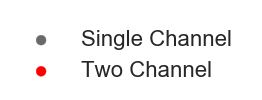

In [22]:
#Just saving the legend as a separate SVG here
saveFigs = True
sns.set(rc={'figure.figsize': (1, 1),'lines.linewidth': 1, 'font.size': 18, 'axes.labelsize': 16, 'axes.titlesize':18, 'legend.fontsize': 16, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style('white')
sns.set_color_codes(palette='colorblind')
#TP vs FALSE STIM RATE
for i in range(0,detectionLatencyCalc.shape[0]):
    if(i == 0): 
        plt.scatter(fpRateCalc[i][:],tpRateCalc[i][:],alpha=1,s=50,color=SINGLECHANNELCOLOR,label='Single Channel')
        plt.scatter(fpRateCalc2[i][:],tpRateCalc2[i][:],alpha=1,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES,label='Two Channel')
    else:
        plt.scatter(fpRateCalc[i][:],tpRateCalc[i][:],alpha=alfa_1Chan,s=50,color=SINGLECHANNELCOLOR)
        plt.scatter(fpRateCalc2[i][:],tpRateCalc2[i][:],alpha=alfa_2Chan,s=50,color=TWOCHANNELCOLOR,marker=TWOCHANNELSHAPES)
plt.xlabel("False stimulations per second")
plt.ylabel("True positive percentage (%)")
plt.xlim([0,0.000001])
# plt.legend(loc='lower right')
plt.ylim([0,0.000004])
# leg = plt.legend(bbox_to_anchor=(1,0.2),loc=2)
handles,labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles,labels)
plt.gca().yaxis.set_visible(False)
plt.gca().xaxis.set_visible(False)
for v in plt.gca().spines.values():
    v.set_visible(False)
if saveFigs:
    plt.savefig('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/legend.svg',bbox_inches='tight')
plt.show()

# Final Figure

In [23]:
#create new SVG figure
fig = sg.SVGFigure("17in", "9in")

#load matplotlib-generated figures
tpThresh = sg.fromfile("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpThresh.svg")
fsrThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fpThresh.svg')
relDetThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/relativeLatThresh.svg')
latThresh = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latThresh.svg')
tpLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latTP.svg')
fsrLat = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/latFPStim.svg')
tpFsp = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/tpFsr.svg')
legend = sg.fromfile('/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/legend.svg')

#get the plot objects
##Top Panel
tpThreshPlot1 = tpThresh.getroot()
fsrThreshPlot2 = fsrThresh.getroot()
relDetThreshPlot4 = relDetThresh.getroot()
latThreshPlot3 = latThresh.getroot()

tpThreshPlot1.moveto(10, 30, scale=1)
fsrThreshPlot2.moveto(400, 30, scale=1)
latThreshPlot3.moveto(400+390, 30, scale=1)
relDetThreshPlot4.moveto(400+390+390, 30, scale=1)

##Bottom Panel
tpLatPlot1 = tpLat.getroot()
fsrLatPlot2 = fsrLat.getroot()
tpFspPlot3 = tpFsp.getroot()
legendPlot = legend.getroot()

tpLatPlot1.moveto(10, 425, scale=1)
fsrLatPlot2.moveto(400, 425, scale=1)
tpFspPlot3.moveto(400+390, 425, scale=1)
legendPlot.moveto(395+390+390,480,scale=1)

#add text labels
##Top :Panel
txt1 = sg.TextElement(5,25, "A", size=20, weight="bold")
txt2 = sg.TextElement(395,25, "B", size=20, weight="bold")
txt3 = sg.TextElement(395+390,25,"C", size=20, weight='bold')
txt4 = sg.TextElement(395+390+390,25,"D", size=20, weight='bold')
##Middle :Panel
txt5 = sg.TextElement(5,430, "E", size=20, weight="bold")
txt6 = sg.TextElement(395,430, "F", size=20, weight="bold")
txt7 = sg.TextElement(395+390,430,"G", size=20, weight='bold')


# append plots and labels to figure
fig.append([tpThreshPlot1, fsrThreshPlot2, latThreshPlot3, relDetThreshPlot4, tpLatPlot1, fsrLatPlot2, tpFspPlot3,\
           legendPlot])
fig.append([txt1, txt2, txt3, txt4, txt5, txt6, txt7,])


fig.save("/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.svg")
os.system("inkscape --export-pdf=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.pdf /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.svg")
os.system("inkscape --export-png=/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.png /home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.svg")


0

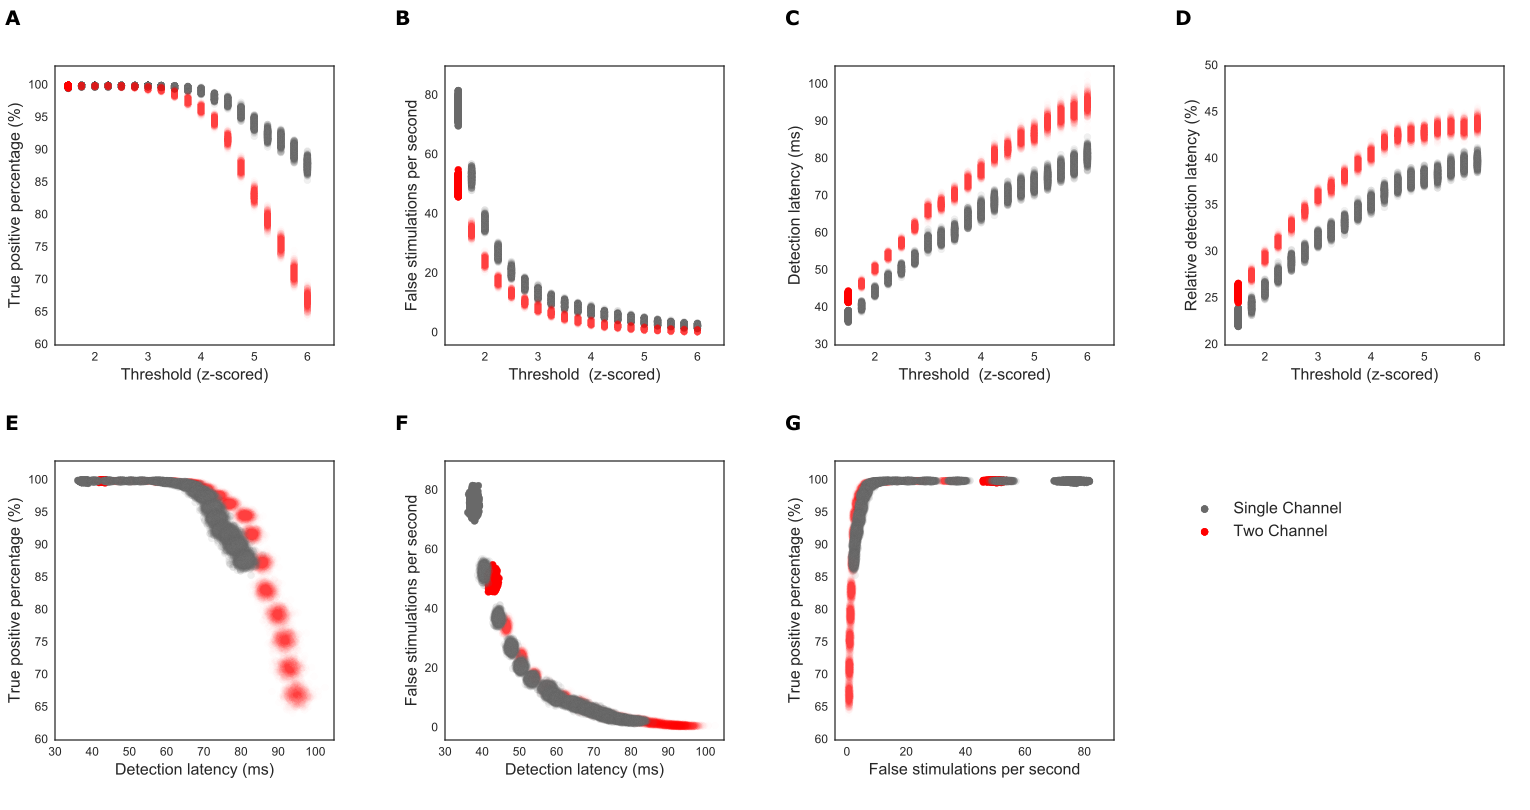

In [24]:
display(Image(filename='/home/shayok/Documents/Code/RippleDetectionAnalysis/Cavaradossi/figures_final/fig6_multichanmetrics/fig6Final.png'))